## Final Code That Puts Everything Together

### Load in packages that we will use

In [5]:
using MLDatasets, Plots, LinearAlgebra, Clustering, ImageCore, Images, MultivariateStats

### Load in and plot dataset

Training set size: (28, 28, 60000)
Testing set size: (28, 28, 10000)


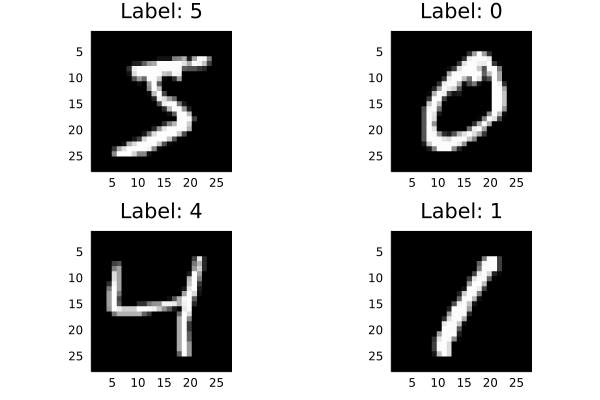

In [82]:
# load full training set
train_x, train_y = MNIST.traindata()

# load full test set
test_x,  test_y  = MNIST.testdata()



println("Training set size: " * string(size(train_x)))
println("Testing set size: " * string(size(test_x)))

p1 = plot(MNIST.convert2image(MNIST.traintensor(1)), title="Label: " * string(MNIST.trainlabels(1)))
p2 = plot(MNIST.convert2image(MNIST.traintensor(2)), title="Label: " * string(MNIST.trainlabels(2)))
p3 = plot(MNIST.convert2image(MNIST.traintensor(3)), title="Label: " * string(MNIST.trainlabels(3)))
p4 = plot(MNIST.convert2image(MNIST.traintensor(4)), title="Label: " * string(MNIST.trainlabels(4)))

# plot example train data
plot(p1, p2, p3, p4, layout = (2, 2), legend = false)

Training set size: (784, 60000)
Testing set size: (784, 10000)


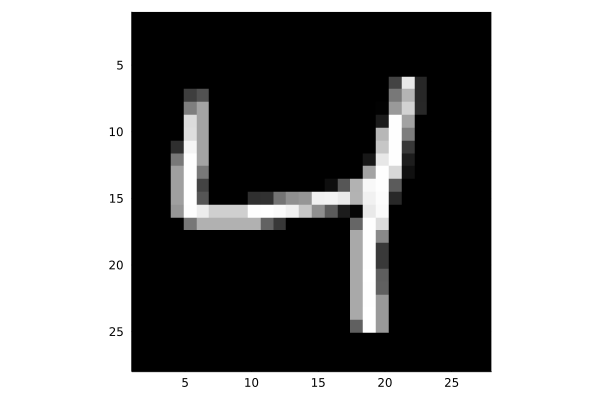

In [91]:
# reformat training data into flattened vectors. each column is a single image

reshaped_train_x = reshape(train_x, (28*28, size(train_x)[3]))
reshaped_test_x = reshape(test_x, (28*28, size(test_x)[3]))

println("Training set size: " * string(size(reshaped_train_x)))
println("Testing set size: " * string(size(reshaped_test_x)))

# make sure we've correctly maintained the data

function reshape_flattened_vector(flat_vector)
    n_rows = 28
    n_cols = 28
    
    # reshape flat vector to 2d image, for some reason img gets
    # flipped along diagonal when reshaping so we transpose it 
    return transpose(reshape(flat_vector, (n_rows, n_cols)))
end

first_ex = reshaped_train_x[:,3]
first_ex_reshaped = reshape_flattened_vector(first_ex)

# show a few of the images to be sure
plot(Gray.(first_ex_reshaped))

In [244]:
# get images of a certain class
function get_mnist_digitclass(digitclass)
    train_x_n = Array{Float64}(undef, 0, 28 * 28)
    test_x_n = Array{Float64}(undef, 0, 28 * 28)
    
    for i = 1:10000 #size(reshaped_train_x)[2] # number of samples
        if(MNIST.trainlabels(i) == digitclass)
            train_x_n = [train_x_n; transpose(reshaped_train_x[:,i])]
        end
    end
    
    for i = 1:5000 #size(reshaped_test_x)[2] # number of samples
        if(MNIST.trainlabels(i) == digitclass)
            test_x_n = [test_x_n; transpose(reshaped_test_x[:,i])]
        end
    end
    
    return (transpose(train_x_n), transpose(test_x_n))
end

train_x_4, test_x_4 = get_mnist_digitclass(4)
train_x_5, test_x_5 = get_mnist_digitclass(5)

([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0])

### Use SVD to reduce an image

In [13]:
test_svd = svd(MNIST.traintensor(3))

SVD{Float32, Float32, Matrix{Float32}}
U factor:
28×28 Matrix{Float32}:
 0.0          0.0         0.0        …  0.0  0.0  0.0  0.0   0.0
 0.0          0.0         0.0           0.0  0.0  0.0  0.0   0.0
 0.0          0.0         0.0           0.0  0.0  0.0  0.0   0.0
 0.182142     0.0680846  -0.0688385     0.0  0.0  0.0  0.0  -7.12033f-7
 0.420268     0.391895    0.0117903     0.0  0.0  0.0  0.0   1.68542f-6
 0.276595     0.291614   -0.0945819  …  0.0  0.0  0.0  0.0  -7.22406f-7
 0.100804    -0.0232858  -0.268302      0.0  0.0  0.0  0.0  -0.581993
 0.100804    -0.0232857  -0.268302      0.0  0.0  0.0  0.0   0.028781
 0.100804    -0.0232858  -0.268302      0.0  0.0  0.0  0.0  -0.0535844
 0.127677    -0.0277781  -0.325862      0.0  0.0  0.0  0.0   0.708284
 0.112057    -0.0174654  -0.302987   …  0.0  0.0  0.0  0.0  -0.00250373
 0.120131    -0.0183686  -0.300249      0.0  0.0  0.0  0.0  -0.316394
 0.112919    -0.0136436  -0.27866       0.0  0.0  0.0  0.0   0.0250801
 ⋮                     

4


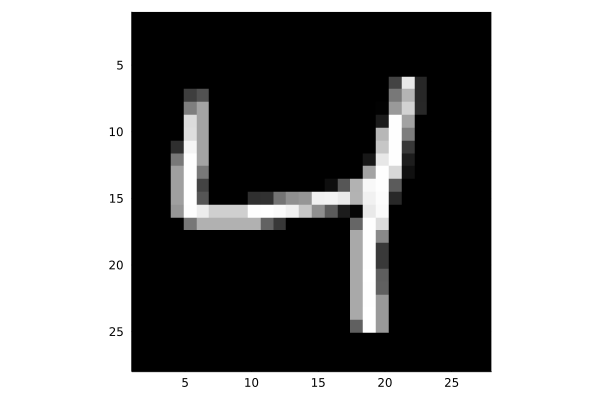

In [14]:
reconstructed_test_svd = transpose((test_svd.U * Diagonal(test_svd.S) * test_svd.Vt))
println(MNIST.trainlabels(3))
plot(Gray.(reconstructed_test_svd))

### Using "low rank" approximation for images

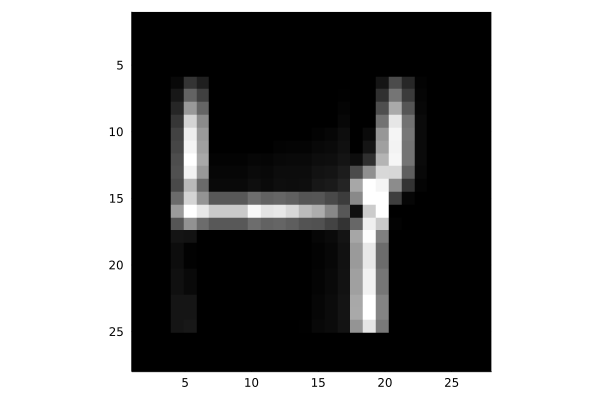

In [15]:
# rank 3 approximation for test_svd
test_svd_3 = transpose(test_svd.U[:, 1:3] * Diagonal(test_svd.S[1:3]) * test_svd.Vt[1:3, :])
plot(Gray.(test_svd_3))

### Run K-Means on dimensionally reduced images

In [ ]:
kmeans()

### Build principal components of MNIST

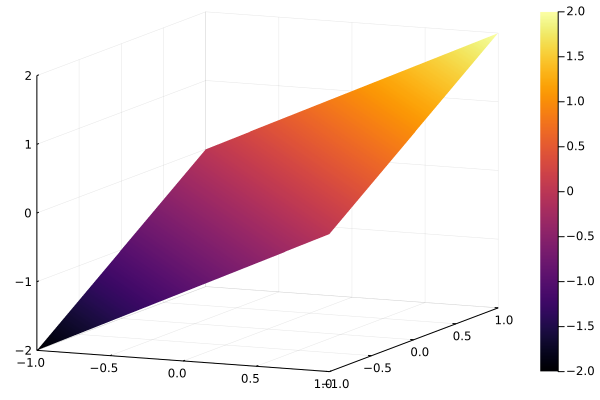

In [183]:
function plane_from_vectors(vec1, vec2)
    normal_vec = cross(vec1, vec2)
    point
end

h(x,y)=x+y

surface(x,y,h)

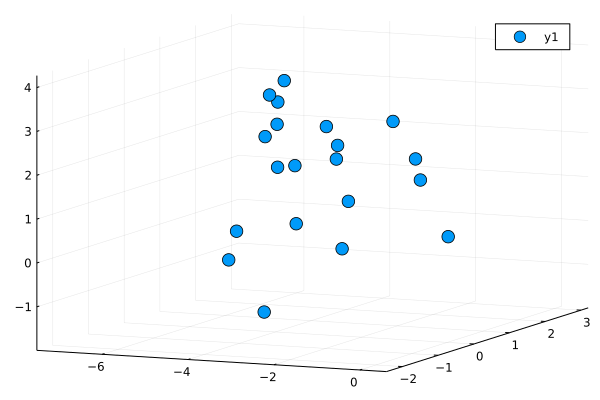

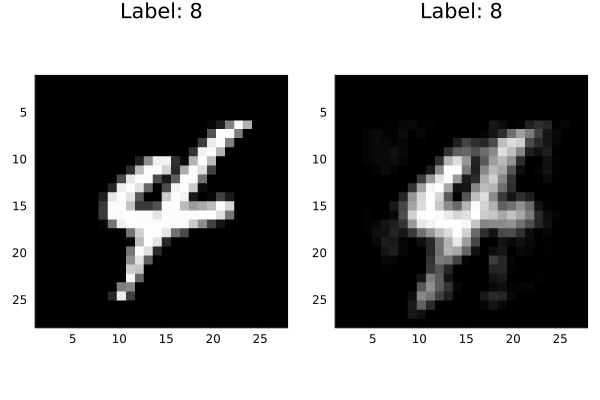

In [290]:
function pca_m(data, n_reduced_dims)
    data = Float64.(data)
    
    pca_model = fit(PCA, data; maxoutdim=n_reduced_dims)
    
    transformed_x = transform(pca_model, data)
    singular_vectors = projection(pca_model)
    
    reconstructed = reconstruct(pca_model, transformed_x)
    
    return (reconstructed, singular_vectors)
end

four_five_data = hcat(train_x_4[:, 1:30], train_x_5[:, 1:30])

pca_mnist_samples, princ_vecs = pca_m(four_five_data, 10)

sample_no = 18

first_ex_pca = pca_mnist_samples[:,sample_no]
first_ex_pca_reshaped = reshape_flattened_vector(first_ex_pca)

first_ex = four_five_data[:,sample_no]
first_ex_reshaped = reshape_flattened_vector(first_ex)

# show a few of the images to be sure
p_orig = plot(Gray.(first_ex_reshaped), title="Label: " * string(MNIST.trainlabels(sample_no)))
p_pca = plot(Gray.(first_ex_pca_reshaped), title="Label: " * string(MNIST.trainlabels(sample_no)))

# project down to principal component subspace
proj = transpose(four_five_data[:, 1:(10 * 2)]) * princ_vecs

# trying to see if we can look at the points in 3D space
# projecting the fours and fives onto principal component axes
plt3d= Plots.plot(proj[:,1],proj[:,2], proj[:,3],
     seriestype=:scatter, markersize = 7)
display(plt3d)

plot(p_orig, p_pca, layout = (1, 2), legend = false)